No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


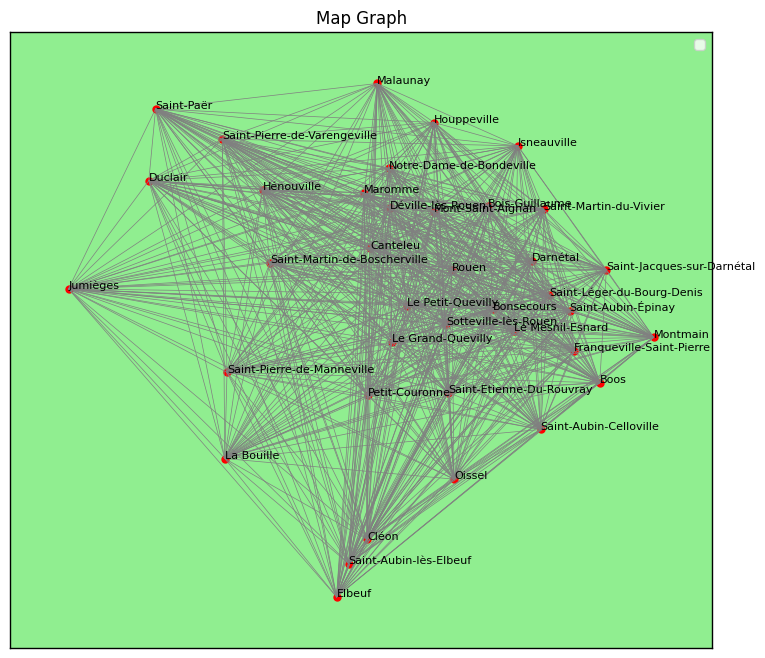

In [1]:
import numpy as np
import random
from Enums.GraphType import GraphType
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

intialGraph = None #todo remove : useless

graph_type = GraphType.Map
match graph_type:
    case GraphType.Random:
        #create random graph
        graph = RandomGraph(node_number=5,min_weight=1,max_weight=10)
    
    case GraphType.Map:
        cities = [
            "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
            "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
            "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
            "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
            "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
            "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
            "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
            "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
        ]

        #cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
        #cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse", "Madrid", "Moscou"]
        #create real graph
        graph = MapGraph(cities=cities,start_city="Boos")

graph.plot_graph()

Removed 0 edges of 703
Costed 0 edges of 703


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


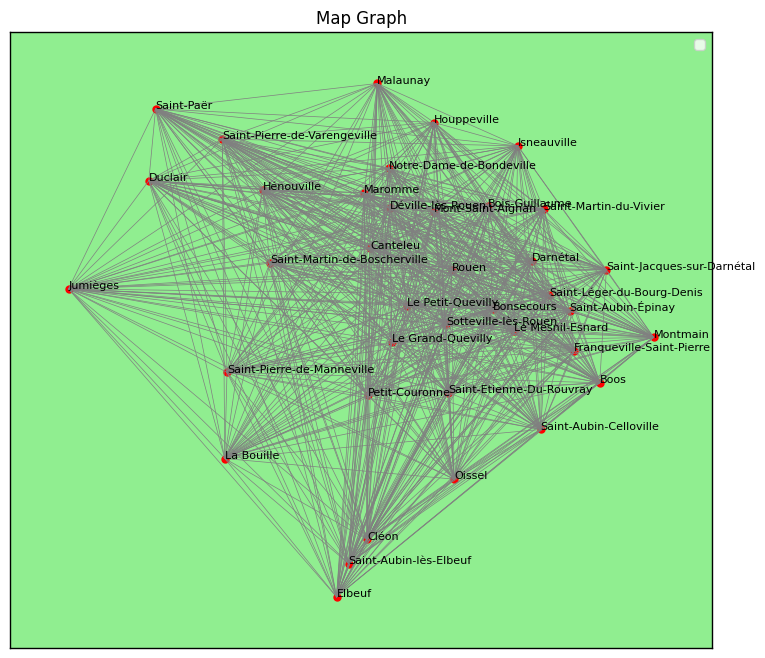

In [2]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Convergence atteinte après 26 itérations.
Best path: ['Boos', 'Montmain', 'Saint-Jacques-sur-Darnétal', 'Saint-Léger-du-Bourg-Denis', 'Darnétal', 'Saint-Martin-du-Vivier', 'Bois-Guillaume', 'Isneauville', 'Houppeville', 'Malaunay', 'Notre-Dame-de-Bondeville', 'Maromme', 'Déville-lès-Rouen', 'Mont-Saint-Aignan', 'Canteleu', 'Saint-Martin-de-Boscherville', 'Hénouville', 'Saint-Pierre-de-Varengeville', 'Saint-Paër', 'Duclair', 'Jumièges', 'Saint-Pierre-de-Manneville', 'La Bouille', 'Elbeuf', 'Saint-Aubin-lès-Elbeuf', 'Cléon', 'Oissel', 'Saint-Etienne-Du-Rouvray', 'Petit-Couronne', 'Le Grand-Quevilly', 'Le Petit-Quevilly', 'Sotteville-lès-Rouen', 'Rouen', 'Bonsecours', 'Le Mesnil-Esnard', 'Saint-Aubin-Celloville', 'Franqueville-Saint-Pierre', 'Saint-Aubin-Épinay', 'Boos']
Total distance: 143.20421838776065


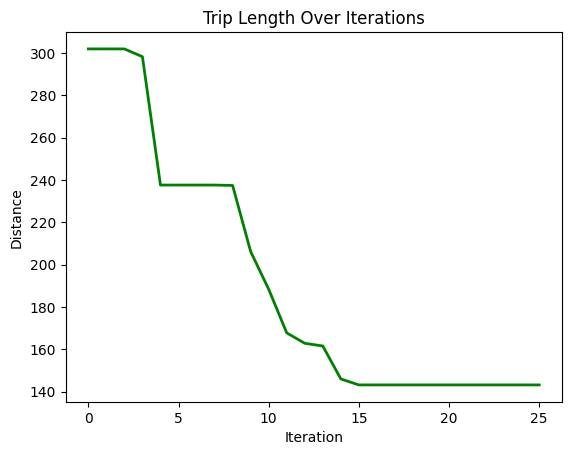

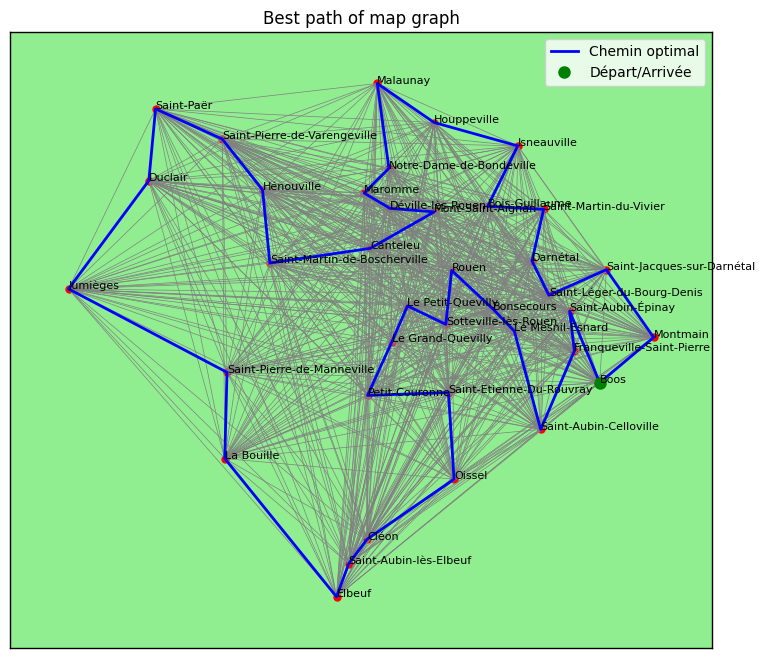

Best path: ['Boos', 'Franqueville-Saint-Pierre', 'Saint-Aubin-Épinay', 'Saint-Léger-du-Bourg-Denis', 'Darnétal', 'Saint-Martin-du-Vivier', 'Bois-Guillaume', 'Mont-Saint-Aignan', 'Déville-lès-Rouen', 'Maromme', 'Notre-Dame-de-Bondeville', 'Houppeville', 'Malaunay', 'Isneauville', 'Rouen', 'Sotteville-lès-Rouen', 'Le Petit-Quevilly', 'Le Grand-Quevilly', 'Petit-Couronne', 'Saint-Etienne-Du-Rouvray', 'Oissel', 'Saint-Aubin-Celloville', 'Le Mesnil-Esnard', 'Bonsecours', 'Saint-Jacques-sur-Darnétal', 'Montmain', 'Canteleu', 'Saint-Martin-de-Boscherville', 'Hénouville', 'Saint-Pierre-de-Varengeville', 'Saint-Paër', 'Duclair', 'Jumièges', 'Saint-Pierre-de-Manneville', 'La Bouille', 'Saint-Aubin-lès-Elbeuf', 'Cléon', 'Elbeuf', 'Boos']
Total distance: 173.33760120121016


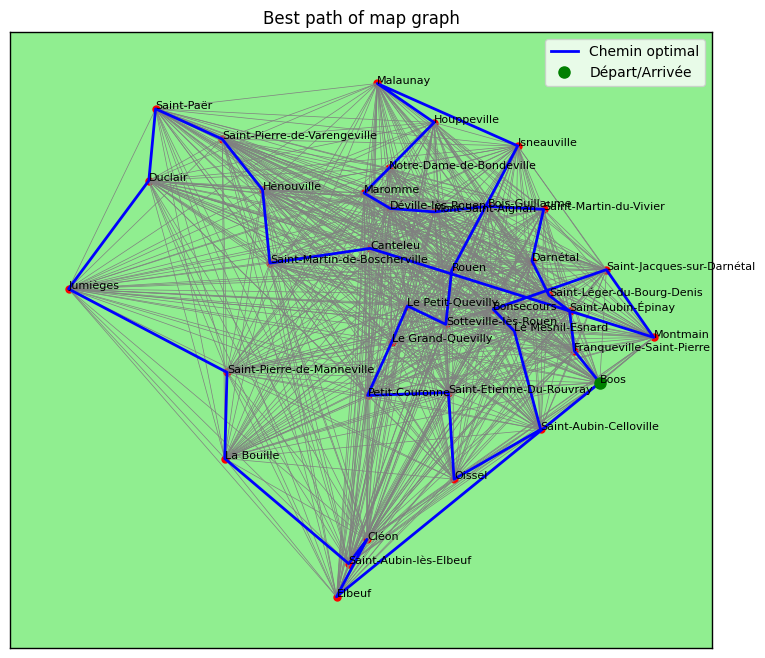

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo

algorithm = AcoAlgo(graph=graph, num_ants=100, decay=0.7, alpha=0.5, max_iterations=100, convergence_threshold=10)
best_path = algorithm.run()  # Run the algorithm to find the best path
best_distance = graph.get_path_distance(best_path)

# Print the best path found and the total distance
print(f"Best path: {best_path}")
print(f"Total distance: {best_distance}")
algorithm.plot_distance_over_iterations()
graph.plot_graph(best_path)

algorithm = GreedyAlgo(graph=graph,max_iterations=100, convergence_threshold=10)
best_path = algorithm.run()  # Run the algorithm to find the best path
best_distance = graph.get_path_distance(best_path)

# Print the best path found and the total distance
print(f"Best path: {best_path}")
print(f"Total distance: {best_distance}")
graph.plot_graph(best_path)

#reset all datas
del algorithm
del best_path
del best_distance